In [0]:
from fastai import *
from fastai.vision import *


In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1

 99% 747M/754M [00:17<00:00, 25.0MB/s]
100% 754M/754M [00:17<00:00, 45.6MB/s]


In [4]:
!unzip mask-datasets-v1 -d Dataset

Archive:  mask-datasets-v1.zip
  inflating: Dataset/Mask_Datasets/Train/Mask/1.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/10.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/100.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/101.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/102.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/103.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/104.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/105.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/106.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/107.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/108.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/109.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/11.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/110.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/111.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/112.PNG  
  inflating: Dataset/Mask_Datasets/Train/Mask/113.PNG  
  inflating: Dataset/

In [0]:
src=(ImageList.from_folder('Dataset/Mask_Datasets')
.split_by_folder(train='Train',valid='Validation')
.label_from_folder())




In [0]:
data=(src.transform(get_transforms(),size=224)
.databunch(bs=128).normalize(imagenet_stats))

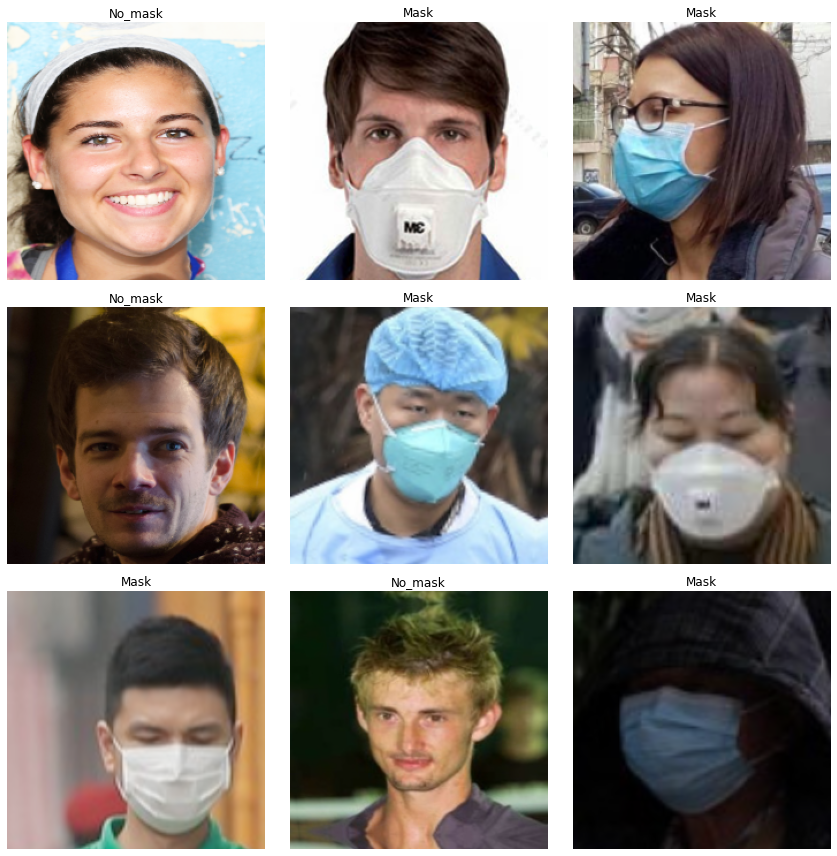

In [11]:
data.show_batch(3,fig_size=(12,12))

In [12]:
len(data.train_ds)

750

In [13]:
len(data.valid_ds)

350

In [0]:
learn=cnn_learner(data,models.mobilenet_v2,metrics=[accuracy,error_rate])

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


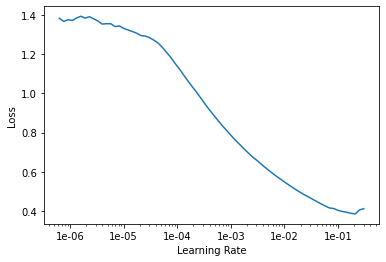

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5,max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.379639,0.132372,0.988571,0.011429,00:31
1,0.214381,0.117841,0.994286,0.005714,00:30
2,0.166444,0.565118,0.971429,0.028571,00:29
3,0.138371,0.136491,0.988571,0.011429,00:29
4,0.105735,0.034248,0.997143,0.002857,00:30


In [0]:
learn.export()

In [0]:
learn.save('stage-1')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

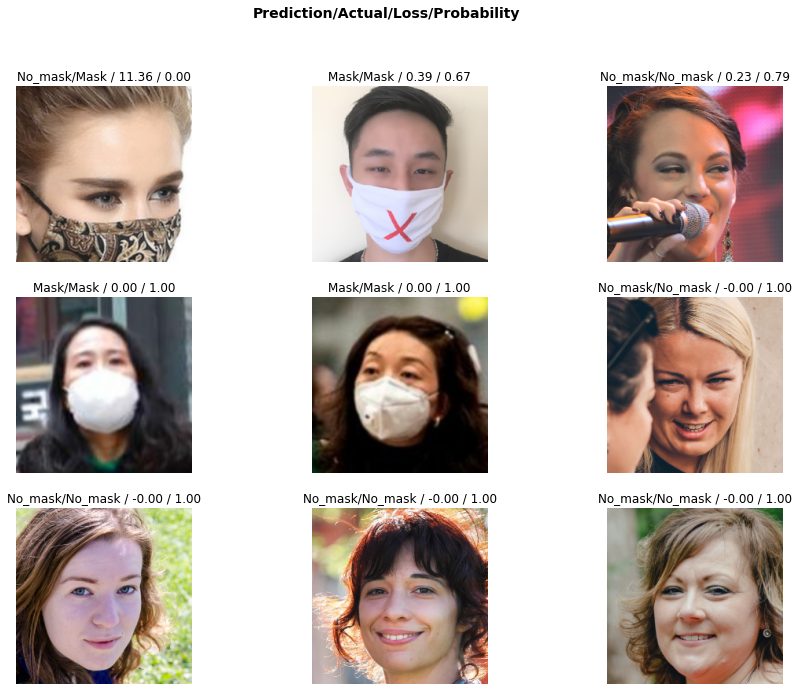

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

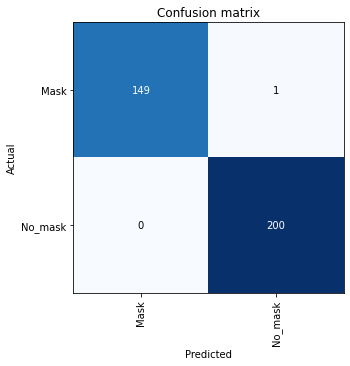

In [23]:
interp.plot_confusion_matrix(figsize=(5,5))

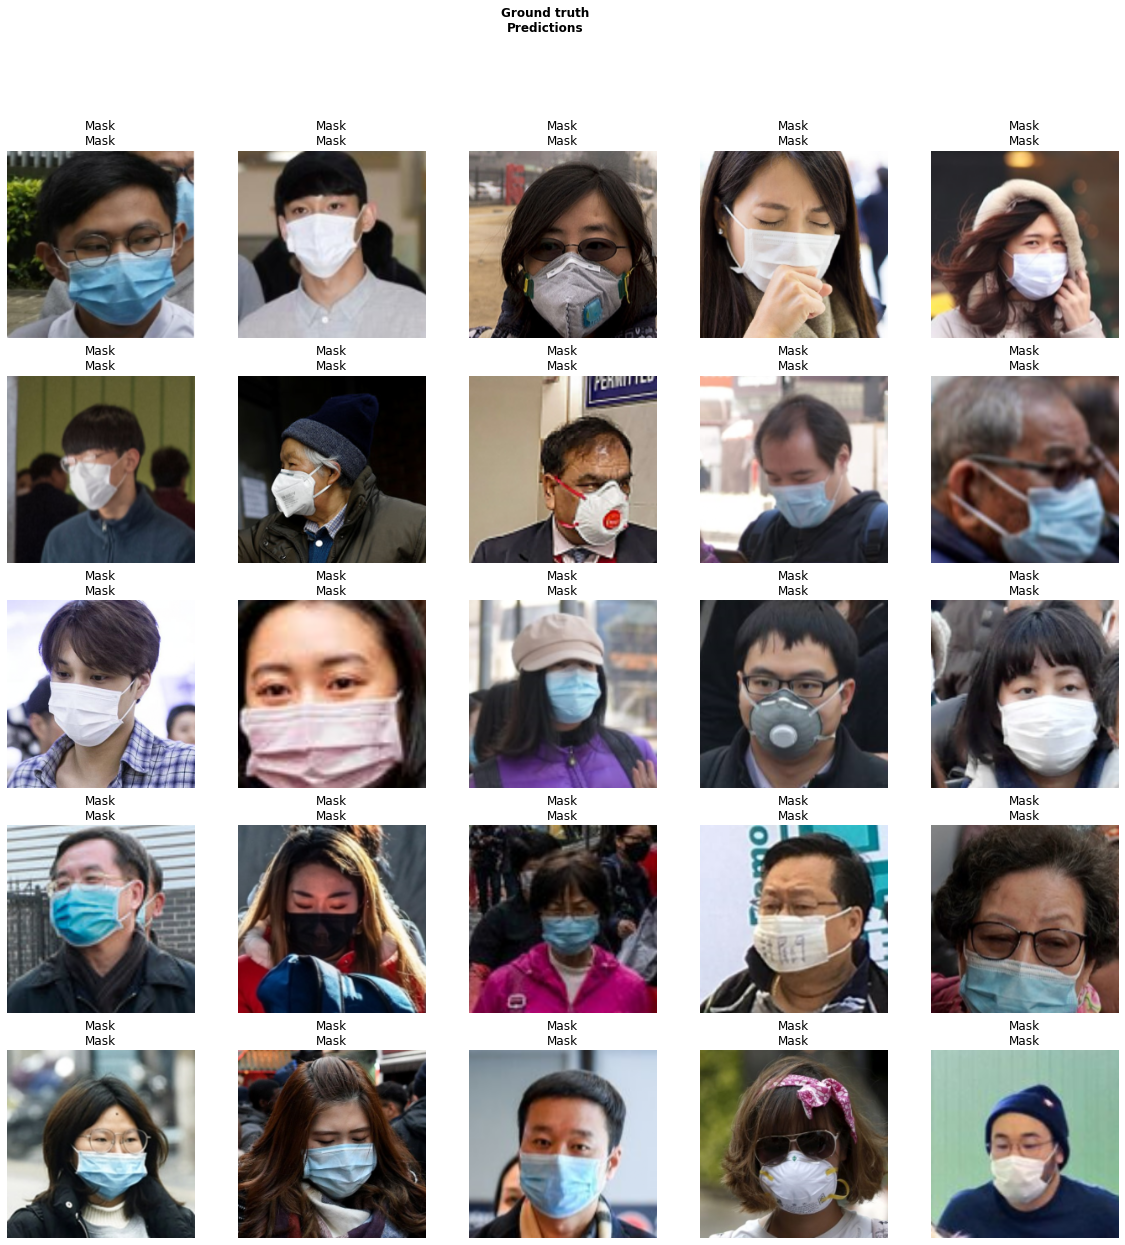

In [25]:
learn.show_results()

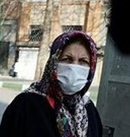

In [30]:
img=open_image('/content/Dataset/Mask_Datasets/Train/Mask/10.PNG')
img

In [31]:
learn.predict(img)

(Category tensor(0), tensor(0), tensor([1.0000e+00, 3.3771e-43]))